<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Deep_Learning_using_Tensorflow/blob/main/Custom_Training_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class model(object):
  def __init__(self):
    self.w=tf.Variable(2.0)
    self.b=tf.Variable(1.0)
  def __call__(self,x):
    return self.w*x+self.b

In [7]:
m1=model()

In [8]:
def loss(predicted_y,target_y):
  return tf.reduce_mean(tf.square(predicted_y-target_y))

In [10]:
true_w=10.0
true_b=3.0
num=1000
x=tf.random.normal(shape=[num])
y=true_w*x+true_b

In [11]:
def train(model,inputs,outputs,learning_rate):
  with tf.GradientTape() as t:
    current_loss=loss(model(inputs),outputs)
    dw,db=t.gradient(current_loss,[model.w,model.b])
    model.w.assign_sub(learning_rate*dw)
    model.b.assign_sub(learning_rate*db)
  return current_loss

In [12]:
m1=model()
list_w=[]
list_b=[]
epochs=range(20)
losses=[]
for epoch in epochs:
  list_w.append(m1.w.numpy())
  list_b.append(m1.b.numpy())
  current_loss=train(m1,x,y,learning_rate=0.1)
  losses.append(current_loss)

In [13]:
list_w[-1],true_w

(9.874977, 10.0)

In [14]:
list_b[-1],true_b

(2.9958162, 3.0)

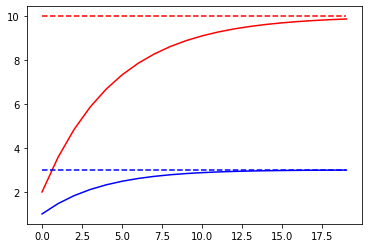

In [21]:
plt.plot(epochs,list_w,"r")
plt.plot(epochs,list_b,"b")
plt.plot(epochs,[true_b]*len(epochs),"b--")
plt.plot(epochs,[true_w]*len(epochs),"r--")

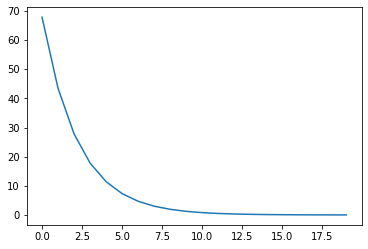

In [24]:
plt.plot(epochs,losses)